In [1]:
# Link->https://www.kaggle.com/c/street-view-getting-started-with-julia/data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import cv2
import pandas as pd
import os

import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

import csv

Using TensorFlow backend.


In [3]:
img_path ='/home/akshay/Downloads/Kaggle data set/First step with julia/trainResized/1.Bmp' 

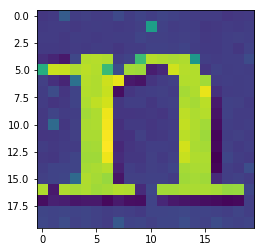

In [4]:
im = cv2.imread(img_path)
img1= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#why we use cmap as we have already convert it to Gray above?
plt.imshow(img)
plt.show()

In [5]:
print type(img)

<type 'numpy.ndarray'>


In [6]:
print img.shape

(20, 20)


In [7]:
img = np.asarray(img).reshape(-1)
print img.shape
print type(img)

(400,)
<type 'numpy.ndarray'>


<type 'numpy.ndarray'>


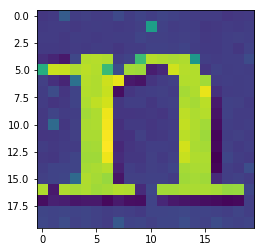

In [8]:
img = img.reshape((20,20))
print type(img)
plt.imshow(img)
plt.show()

In [9]:
data = pd.read_csv('/home/akshay/Downloads/Kaggle data set/First step with julia/trainLabels.csv')

In [10]:
print data.shape
print type(data)
data.head()

(6283, 2)
<class 'pandas.core.frame.DataFrame'>


,ID,Class
0,1,n
1,2,8
2,3,T
3,4,I
4,5,R


In [11]:
print data.shape
data = data.drop(["ID"],axis=1)
print data.shape

(6283, 2)
(6283, 1)


In [12]:
data = pd.get_dummies(data)
print data.shape

(6283, 62)


In [13]:
print type(data)
print data.shape
data.head()

<class 'pandas.core.frame.DataFrame'>
(6283, 62)


,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,...,Class_q,Class_r,Class_s,Class_t,Class_u,Class_v,Class_w,Class_x,Class_y,Class_z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
lt = list(data)
print lt[0]
print len(lt)

Class_0
62


In [15]:
Y = data.values[:,:]
print type(Y)

<type 'numpy.ndarray'>


In [16]:
print Y
print Y.shape

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(6283, 62)


In [17]:
print type(Y)

<type 'numpy.ndarray'>


In [18]:
source ='/home/akshay/Downloads/Kaggle data set/First step with julia/trainResized/'

In [19]:
total = os.listdir(source)
print type(total)
print len(total)
print total[0]

<type 'list'>
6283
1873.Bmp


In [20]:
total.sort()

In [21]:
total[:5]

['1.Bmp', '10.Bmp', '100.Bmp', '1000.Bmp', '1001.Bmp']

In [22]:
p = []
for ix in range(1,6284):
    temp =str(ix)
    p.append(temp)

In [23]:
print len(p)
print p[0],p[6282]

6283
1 6283


In [24]:
l = []
for ix in p:
    path = source + ix +'.Bmp'
    im = cv2.imread(path)
    img1= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    img = np.asarray(img).reshape(-1)
    img = img/255.0
    l.append([img])
    #break
    

In [25]:
print len(l[0])
#print l[0]

1


In [26]:
X= np.array(l)
print X.shape

(6283, 1, 400)


In [27]:
#X_train[0]

In [28]:
X = X.reshape(6283,400)
print X.shape

(6283, 400)


In [29]:
split = int(0.8*data.shape[0])

X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split,:]
Y_test = Y[split:,:]

print X_train.shape,X_test.shape
print Y_train.shape,Y_test.shape
print type(X_train)

(5026, 400) (1257, 400)
(5026, 62) (1257, 62)
<type 'numpy.ndarray'>


In [30]:
#done to check whether x and y are correctly matched
x = X_train[0]
y = Y_train[0]
print x.shape
print y.shape

(400,)
(62,)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


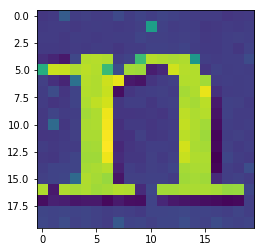

In [31]:
print y
img = x.reshape(20,20)
plt.imshow(img)
plt.show()

In [32]:
model = Sequential()
model.add(Dense(10,input_shape=(400,)))
model.add(Activation('relu'))
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(62))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                4010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                275       
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 62)                1612      
_________________________________________________________________
activation_3 (Activation)    (None, 62)                0         
Total params: 5,897
Trainable params: 5,897
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile( optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy']) 

In [34]:
model.fit(X_train,Y_train , batch_size=16 , nb_epoch=50 , verbose = 2, validation_data = (X_test,Y_test))

/home/akshay/.local/lib/python2.7/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 5026 samples, validate on 1257 samples
Epoch 1/50
 - 1s - loss: 3.9061 - acc: 0.0613 - val_loss: 3.7701 - val_acc: 0.0819
Epoch 2/50
 - 1s - loss: 3.7912 - acc: 0.0830 - val_loss: 3.7463 - val_acc: 0.0875
Epoch 3/50
 - 1s - loss: 3.7435 - acc: 0.0933 - val_loss: 3.6795 - val_acc: 0.0875
Epoch 4/50
 - 1s - loss: 3.6632 - acc: 0.1122 - val_loss: 3.6071 - val_acc: 0.1233
Epoch 5/50
 - 1s - loss: 3.5718 - acc: 0.1373 - val_loss: 3.5017 - val_acc: 0.1718
Epoch 6/50
 - 1s - loss: 3.4543 - acc: 0.1653 - val_loss: 3.4210 - val_acc: 0.1877
Epoch 7/50
 - 1s - loss: 3.3478 - acc: 0.1886 - val_loss: 3.3223 - val_acc: 0.2045
Epoch 8/50
 - 1s - loss: 3.2436 - acc: 0.2105 - val_loss: 3.2199 - val_acc: 0.2180
Epoch 9/50
 - 1s - loss: 3.1404 - acc: 0.2270 - val_loss: 3.1175 - val_acc: 0.2212
Epoch 10/50
 - 1s - loss: 3.0539 - acc: 0.2384 - val_loss: 3.0672 - val_acc: 0.2371
Epoch 11/50
 - 1s - loss: 2.9719 - acc: 0.2545 - val_loss: 3.0304 - val_acc: 0.2506
Epoch 12/50
 - 1s - loss: 2.9092 - ac

In [35]:
test_path = '/home/akshay/Downloads/Kaggle data set/First step with julia/testResized/'

In [36]:
test = os.listdir(test_path)
print type(test)
print len(test)
print test[0]

<type 'list'>
6220
7277.Bmp


In [37]:
v = []
for ix in range(6284,12504):
    #print ix 
    temp =str(ix)
    v.append(temp)
    #break

In [38]:
print len(v)

6220


In [39]:
print v[0],v[6219]

6284 12503


In [40]:
t = []
for ix in v:
    path = test_path+ ix +'.Bmp'
    im = cv2.imread(path)
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 
    img = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    img = np.asarray(img).reshape(-1)
    img = img/255.0
    t.append([img])

In [41]:
test_data = np.array(t)
print test_data.shape

(6220, 1, 400)


In [42]:
test_data = test_data.reshape(6220,400)
print test_data.shape

(6220, 400)


In [43]:
y_pred = model.predict(test_data)

In [44]:
y_pred.shape

(6220, 62)

In [45]:
y_pred[0]

array([  5.67469746e-03,   1.99478548e-02,   1.79451443e-02,
         1.92781200e-03,   7.69521967e-02,   3.78094119e-04,
         3.57969431e-04,   1.30220857e-02,   1.15201394e-04,
         7.55323737e-04,   1.26481473e-01,   8.49646050e-04,
         1.10929199e-02,   4.42665396e-03,   3.73270772e-02,
         5.45766903e-03,   3.39055480e-03,   9.44378902e-04,
         1.79724157e-01,   6.06395565e-02,   2.06082757e-03,
         9.87376086e-03,   1.72760012e-03,   6.45043096e-04,
         8.49103741e-03,   7.99179717e-04,   7.16959825e-03,
         1.82882068e-03,   2.86249514e-03,   5.48364036e-02,
         3.28924600e-03,   2.54883477e-03,   1.11117982e-03,
         3.79012013e-03,   3.66060063e-03,   3.36336531e-02,
         1.33159915e-02,   6.28361377e-05,   1.76037068e-03,
         1.21530518e-02,   4.43251990e-03,   6.83813589e-03,
         2.04078271e-03,   3.22940148e-04,   7.88712129e-02,
         2.11749896e-02,   1.03346852e-03,   6.84389099e-02,
         1.91538164e-03,

In [46]:
y_pred[0][0]

0.0056746975

In [47]:
print y_pred[0].max()
print y_pred[0].argmax()

print y_pred[0][y_pred[0].argmax()]

0.179724
18
0.179724


In [48]:
c = data.columns
print c

Index([u'Class_0', u'Class_1', u'Class_2', u'Class_3', u'Class_4', u'Class_5',
       u'Class_6', u'Class_7', u'Class_8', u'Class_9', u'Class_A', u'Class_B',
       u'Class_C', u'Class_D', u'Class_E', u'Class_F', u'Class_G', u'Class_H',
       u'Class_I', u'Class_J', u'Class_K', u'Class_L', u'Class_M', u'Class_N',
       u'Class_O', u'Class_P', u'Class_Q', u'Class_R', u'Class_S', u'Class_T',
       u'Class_U', u'Class_V', u'Class_W', u'Class_X', u'Class_Y', u'Class_Z',
       u'Class_a', u'Class_b', u'Class_c', u'Class_d', u'Class_e', u'Class_f',
       u'Class_g', u'Class_h', u'Class_i', u'Class_j', u'Class_k', u'Class_l',
       u'Class_m', u'Class_n', u'Class_o', u'Class_p', u'Class_q', u'Class_r',
       u'Class_s', u'Class_t', u'Class_u', u'Class_v', u'Class_w', u'Class_x',
       u'Class_y', u'Class_z'],
      dtype='object')


In [49]:
print type(c)

<class 'pandas.core.indexes.base.Index'>


In [50]:
dict_={}
count = 0

for ix in c:
    dict_[count] = ix[-1]
    count = count + 1

In [51]:
print dict_

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


In [52]:
print dict_[28]

S


In [53]:
ans = []
#i = []
for ix in range(y_pred.shape[0]):
    #print ix
    #i.append(ix)
    temp = y_pred[ix].argmax()
    ans.append(dict_[temp])

In [55]:
print type(ans)
ans = np.array(ans)
#i = np.array(i)
print type(ans)
print ans.shape
print ans[0]
#print i.shape

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(6220,)
I


In [56]:
print type(y_pred)
print type(y_pred[0]),type(ans[0])

<type 'numpy.ndarray'>
<type 'numpy.ndarray'> <type 'numpy.string_'>


In [57]:
#np.savetxt('/home/akshay/Downloads/Kaggle data set/First step with julia/output.csv',ans,delimiter=',')

In [58]:
df = pd.DataFrame(data=ans)
print df.shape
print ans[0]

(6220, 1)
I


In [59]:
df.head()

,0
0,I
1,E
2,A
3,C
4,P


In [62]:
print type(df)

<class 'pandas.core.frame.DataFrame'>


In [64]:
df.to_csv("/home/akshay/Downloads/Kaggle data set/First step with julia/output.csv")